In [12]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pwd

/home/kaan/Desktop/Python/inzva/Palm-Fiction


In [19]:
curr_path = os.getcwd()
dataset = os.path.join(curr_path,"Padded_Imgs")
bounding_boxes = os.path.join(curr_path,"bounding_boxes","cam1")
joints_path = os.path.join(curr_path,"Padded_Joints")

dataset,bounding_boxes,joints_path

('/home/kaan/Desktop/Python/inzva/Palm-Fiction/Padded_Imgs',
 '/home/kaan/Desktop/Python/inzva/Palm-Fiction/bounding_boxes/cam1',
 '/home/kaan/Desktop/Python/inzva/Palm-Fiction/Padded_Joints')

In [7]:
def get_bound_width_heght(bound):
  width = bound.loc['top_right']['x'] - bound.loc['top_left']['x']
  height =  bound.loc['bottom_left']['y'] - bound.loc['top_left']['y']
  return width,height

In [17]:
def get_bound(path):
  with open(path, 'r') as reader:
    bounds = reader.readlines()
    bounds = [bound.split(' ')[1] for bound in bounds]

  bounds = [int(i) for i in bounds]
  #print("top, left, bottom, right")
  #print(bounds)

  bound_list = [['top_left',bounds[1],bounds[0]],
                ['top_right',bounds[3],bounds[0]],
                ['bottom_left',bounds[1],bounds[2]],
                ['bottom_right',bounds[3],bounds[2]]]
  #row_list.append(bound_list)

  bound_df = pd.DataFrame(bound_list,columns=["name","x","y"])
  bound_df.set_index('name',inplace=True)
  return bound_df

In [28]:
def get_joints(path):
    return pd.read_pickle(path)

In [9]:
def get_img(path):
  img = plt.imread(path)
  return img

In [10]:
def get_item(index):
  if index == -1:
    index = random.randint(0,600)
  sample_img = os.path.join(dataset,str(index)+".jpg")
  sample_joints = os.path.join(joints_path,str(index)+".pkl")
  sample_bound = os.path.join(bounding_boxes,str(index)+"_bbox_1.txt")
  #print(index)
  #===============================================================#
  img = get_img(sample_img)
  #===============================================================#
  joints = get_joints(sample_joints)
  #===============================================================#
  bound_df = get_bound(sample_bound)
  #===============================================================#
  return img,joints,bound_df

In [20]:
img,joints,bound_df = get_item(-1)

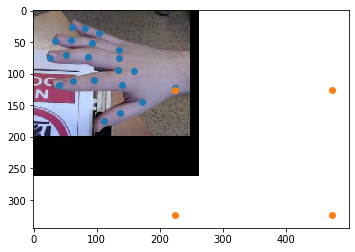

In [27]:
plt.imshow(img)
plt.scatter(joints['x'],joints['y'])
plt.scatter(bound_df['x'],bound_df['y'])